# Library

In [397]:
!pip install feature-engine

In [398]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from feature_engine.outliers import Winsorizer
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder,LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

In [399]:
data = pd.read_csv("../input/student-performance-prediction/student_performance_dataset.csv")
data

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,S147,Male,31,68.267841,86,High School,Yes,Yes,63,Pass
1,S136,Male,16,78.222927,73,PhD,No,No,50,Fail
2,S209,Female,21,87.525096,74,PhD,Yes,No,55,Fail
3,S458,Female,27,92.076483,99,Bachelors,No,No,65,Pass
4,S078,Female,37,98.655517,63,Masters,No,Yes,70,Pass
...,...,...,...,...,...,...,...,...,...,...
703,S492,Male,14,84.658761,78,PhD,Yes,No,50,Fail
704,S301,Male,35,60.278990,83,Masters,No,No,62,Pass
705,S473,Male,25,98.384969,75,Bachelors,Yes,No,57,Fail
706,S307,Female,21,96.148012,84,Bachelors,Yes,No,65,Pass


In [400]:
data.dtypes

Student_ID                     object
Gender                         object
Study_Hours_per_Week            int64
Attendance_Rate               float64
Past_Exam_Scores                int64
Parental_Education_Level       object
Internet_Access_at_Home        object
Extracurricular_Activities     object
Final_Exam_Score                int64
Pass_Fail                      object
dtype: object

In [401]:
data.describe()

,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Final_Exam_Score
count,708.000000,708.000000,708.000000,708.000000
mean,26.132768,78.107722,77.871469,58.771186
std,8.877727,13.802802,14.402739,6.705877
min,10.000000,50.116970,50.000000,50.000000
25%,19.000000,67.550094,65.000000,52.000000
50%,27.000000,79.363046,79.000000,59.500000
75%,34.000000,89.504232,91.000000,64.000000
max,39.000000,99.967675,100.000000,77.000000


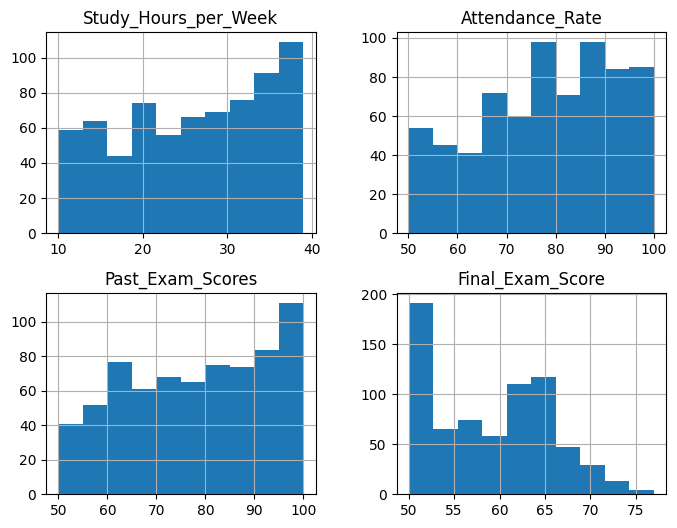

In [402]:
numerical_features = ['Study_Hours_per_Week', 'Attendance_Rate', 'Past_Exam_Scores', 'Final_Exam_Score']

data[numerical_features].hist(figsize = (8,6));

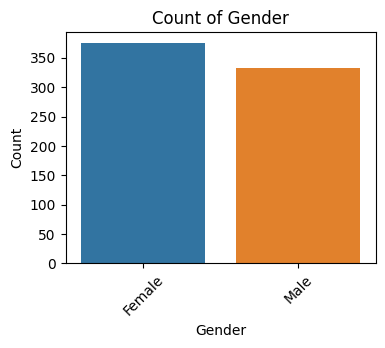

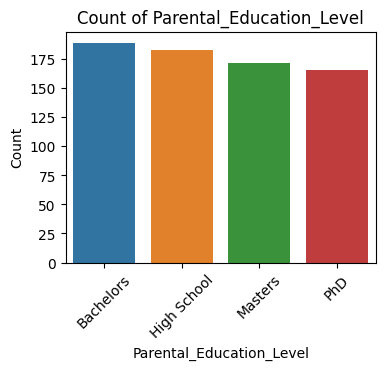

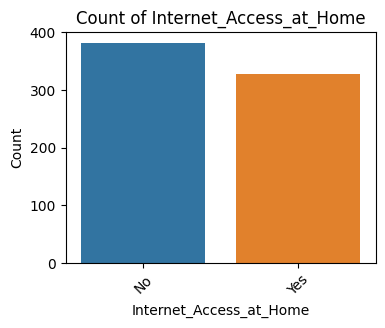

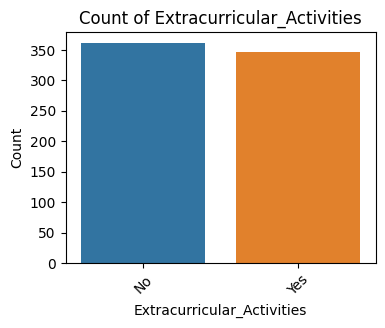

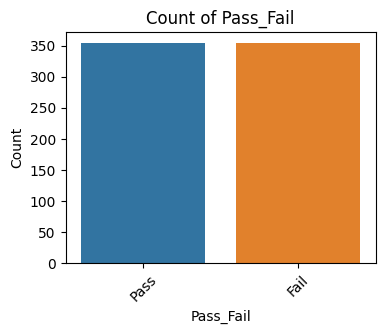

In [403]:
categorical_features = ['Gender', 'Parental_Education_Level', 'Internet_Access_at_Home', 'Extracurricular_Activities', 'Pass_Fail']
 
for feature in categorical_features:
    plt.figure(figsize=(4, 3))
    sns.countplot(data=data, x=feature, order=data[feature].value_counts().index)
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [404]:
data.nunique()

Student_ID                    500
Gender                          2
Study_Hours_per_Week           30
Attendance_Rate               500
Past_Exam_Scores               51
Parental_Education_Level        4
Internet_Access_at_Home         2
Extracurricular_Activities      2
Final_Exam_Score               27
Pass_Fail                       2
dtype: int64

In [405]:
for col in data.select_dtypes(include='object').columns:
    print(f"Kolom: {col}")
    print(data[col].value_counts())
    print("\n" + "="*40 + "\n")

Kolom: Student_ID
Student_ID
S235    6
S339    6
S368    5
S032    5
S207    5
       ..
S333    1
S120    1
S263    1
S291    1
S252    1
Name: count, Length: 500, dtype: int64


Kolom: Gender
Gender
Female    375
Male      333
Name: count, dtype: int64


Kolom: Parental_Education_Level
Parental_Education_Level
Bachelors      189
High School    183
Masters        171
PhD            165
Name: count, dtype: int64


Kolom: Internet_Access_at_Home
Internet_Access_at_Home
No     381
Yes    327
Name: count, dtype: int64


Kolom: Extracurricular_Activities
Extracurricular_Activities
No     361
Yes    347
Name: count, dtype: int64


Kolom: Pass_Fail
Pass_Fail
Pass    354
Fail    354
Name: count, dtype: int64




# Missing Value

## Cek Missing Value

In [406]:
data.isnull().sum()

Student_ID                    0
Gender                        0
Study_Hours_per_Week          0
Attendance_Rate               0
Past_Exam_Scores              0
Parental_Education_Level      0
Internet_Access_at_Home       0
Extracurricular_Activities    0
Final_Exam_Score              0
Pass_Fail                     0
dtype: int64

# Encoder

In [407]:
from sklearn.preprocessing import OneHotEncoder

# Pastikan NaN sudah diimputasi
data['Parental_Education_Level'] = data['Parental_Education_Level'].fillna(data['Parental_Education_Level'].mode()[0])

# Encoder setup
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit dan transform
encoded_array = encoder.fit_transform(data[['Parental_Education_Level']])

# Ambil nama kolom
encoded_columns = encoder.get_feature_names_out(['Parental_Education_Level'])

# Ubah jadi DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoded_columns, index=data.index)

# Gabung ke data asli
data = pd.concat([data.drop('Parental_Education_Level', axis=1), encoded_df], axis=1)


In [408]:
kolom_tertentu = ['Gender', 'Pass_Fail', 'Internet_Access_at_Home', 'Extracurricular_Activities']

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Loop melalui setiap kolom dan lakukan label encoding
for kolom in kolom_tertentu:
    data[kolom] = label_encoder.fit_transform(data[kolom])

data

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail,Parental_Education_Level_Bachelors,Parental_Education_Level_High School,Parental_Education_Level_Masters,Parental_Education_Level_PhD
0,S147,1,31,68.267841,86,1,1,63,1,0.0,1.0,0.0,0.0
1,S136,1,16,78.222927,73,0,0,50,0,0.0,0.0,0.0,1.0
2,S209,0,21,87.525096,74,1,0,55,0,0.0,0.0,0.0,1.0
3,S458,0,27,92.076483,99,0,0,65,1,1.0,0.0,0.0,0.0
4,S078,0,37,98.655517,63,0,1,70,1,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,S492,1,14,84.658761,78,1,0,50,0,0.0,0.0,0.0,1.0
704,S301,1,35,60.278990,83,0,0,62,1,0.0,0.0,1.0,0.0
705,S473,1,25,98.384969,75,1,0,57,0,1.0,0.0,0.0,0.0
706,S307,0,21,96.148012,84,1,0,65,1,1.0,0.0,0.0,0.0


In [409]:
cleaned_data = data.drop(columns=['Student_ID'])
corr = cleaned_data.corr()
corr

,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail,Parental_Education_Level_Bachelors,Parental_Education_Level_High School,Parental_Education_Level_Masters,Parental_Education_Level_PhD
Gender,1.000000,-0.032604,-0.017163,-0.003972,0.035188,-0.029479,-0.032857,-0.065086,-0.031308,0.077100,-0.049111,0.002638
Study_Hours_per_Week,-0.032604,1.000000,-0.008150,-0.014756,0.042341,-0.065312,0.370387,0.296769,-0.071655,-0.015382,0.067067,0.023007
Attendance_Rate,-0.017163,-0.008150,1.000000,0.000412,0.087180,0.055839,0.460478,0.396283,0.018920,-0.044385,0.047708,-0.022133
Past_Exam_Scores,-0.003972,-0.014756,0.000412,1.000000,-0.032474,0.013663,0.489516,0.436607,0.032676,0.045845,0.008020,-0.089784
Internet_Access_at_Home,0.035188,0.042341,0.087180,-0.032474,1.000000,0.055160,-0.013181,-0.053829,-0.085130,0.061340,0.112668,-0.088507
Extracurricular_Activities,-0.029479,-0.065312,0.055839,0.013663,0.055160,1.000000,0.067629,0.104540,0.034290,-0.056087,0.001259,0.020927
Final_Exam_Score,-0.032857,0.370387,0.460478,0.489516,-0.013181,0.067629,1.000000,0.864175,0.032041,-0.056872,0.069006,-0.044494
Pass_Fail,-0.065086,0.296769,0.396283,0.436607,-0.053829,0.104540,0.864175,1.000000,0.015965,-0.035488,0.062700,-0.043431
Parental_Education_Level_Bachelors,-0.031308,-0.071655,0.018920,0.032676,-0.085130,0.034290,0.032041,0.015965,1.000000,-0.356281,-0.340532,-0.332651
Parental_Education_Level_High School,0.077100,-0.015382,-0.044385,0.045845,0.061340,-0.056087,-0.056872,-0.035488,-0.356281,1.000000,-0.333163,-0.325453


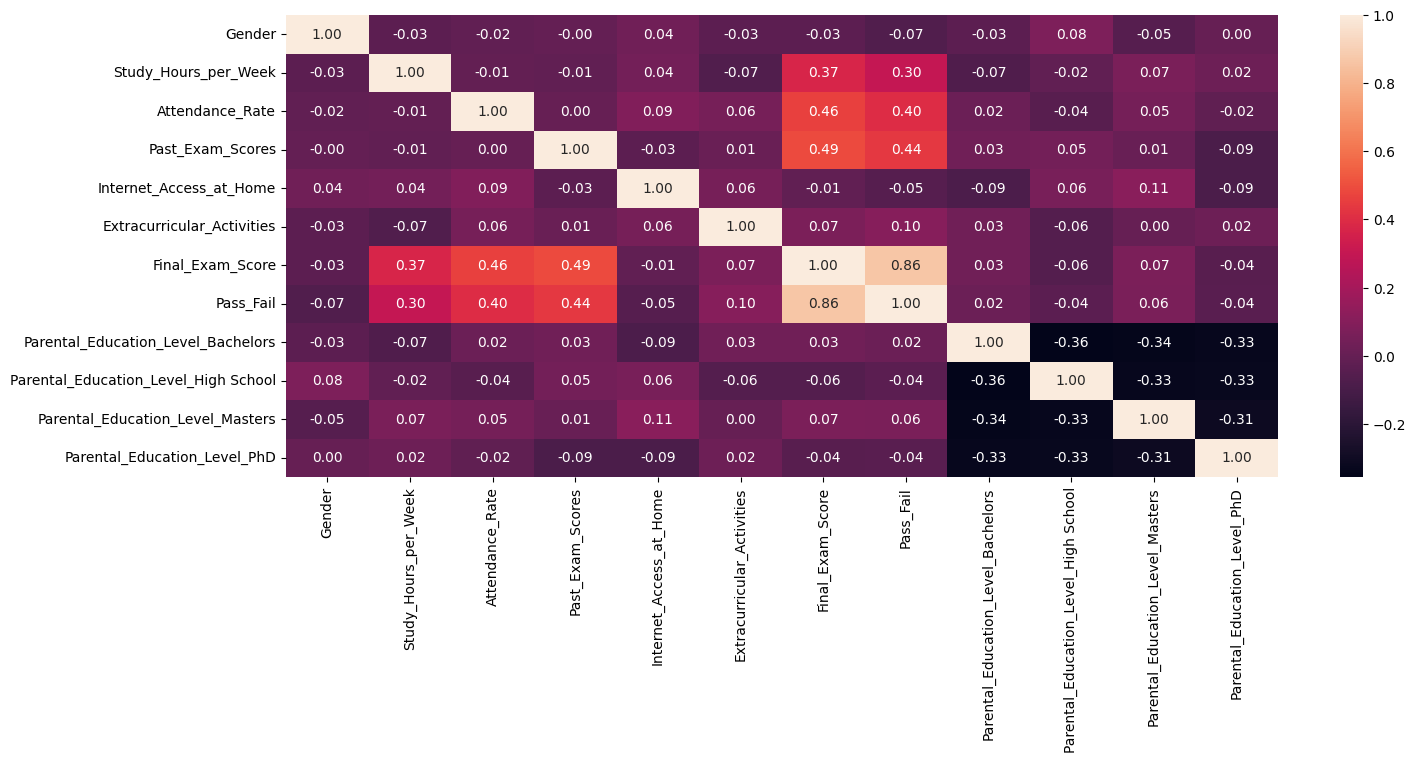

In [410]:
plt.figure(figsize=(16, 6))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

In [411]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Pisah fitur dan target
X = filtered_data.drop('Pass_Fail', axis=1)
y = filtered_data['Pass_Fail']

X['Final_Exam_Score'] = X['Final_Exam_Score'] + np.random.normal(0, 1, size=X.shape[0])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model dengan parameter dibatasi
rf_classifier = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)
rf_classifier.fit(X_train, y_train)

# Prediksi
y_pred = rf_classifier.predict(X_test)

# Evaluasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Akurasi: 0.9648
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        71
           1       1.00      0.93      0.96        71

    accuracy                           0.96       142
   macro avg       0.97      0.96      0.96       142
weighted avg       0.97      0.96      0.96       142



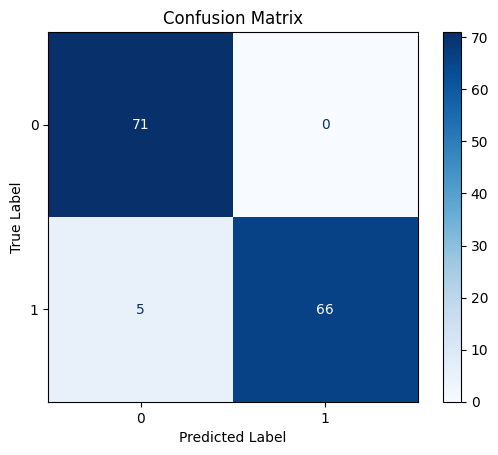

In [412]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Prediksi pada data uji
y_pred = rf_classifier.predict(X_test)

# Hitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Mendapatkan label kelas yang unik dari data uji
classes = rf_classifier.classes_

# Menampilkan confusion matrix secara visual
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=classes)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [413]:
from sklearn.ensemble import RandomForestClassifier
import joblib

# Contoh pelatihan model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Simpan model yang sudah fit
joblib.dump(rf, "student_performance_model.pkl")


['student_performance_model.pkl']